In [1]:
import sys
sys.path.append('../')

In [2]:
import sklearn as sk

import pandas as pd

import seaborn as sns

from icecream import ic

from radiousAngleMethod import radiousAngleMethod
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import make_blobs


from numericalResults import dataResults
from plotting import plot_data

import time

In [3]:
iris = sk.datasets.load_iris()
wine = sk.datasets.load_wine()
cancer = sk.datasets.load_breast_cancer()
diabetes = sk.datasets.load_diabetes()

In [4]:
pca = sk.decomposition.PCA(n_components=2)

In [5]:
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

In [6]:
pca.fit(wine.data)
wine_pca = pca.transform(wine.data)

In [7]:
pca.fit(cancer.data)
cancer_pca = pca.transform(cancer.data)

In [8]:
standard_scaler = sk.preprocessing.StandardScaler()

iris_standard = standard_scaler.fit_transform(iris_pca)
wine_standard = standard_scaler.fit_transform(wine_pca)
cancer_standard = standard_scaler.fit_transform(cancer_pca)

In [9]:
cancer_data_default = cancer
cancer_data = pca.fit_transform(cancer_data_default.data)
cancer_data = standard_scaler.fit_transform(cancer_data)

ic| pearson_cov: PearsonRResult(statistic=np.float64(6.5607241861442844e-15), pvalue=np.float64(0.9999999999998735))
    mean: np.float64(-1.560946256063489e-17)
    median: np.float64(-0.18108408104222115)
    variance: np.float64(1.0000000000000062)
    desc:             Default
          count  5.690000e+02
          mean  -1.560946e-17
          std    1.000880e+00
          min   -3.023683e+00
          25%   -6.102327e-01
          50%   -1.810841e-01
          75%    3.667044e-01
          max    8.725930e+00


(PearsonRResult(statistic=np.float64(6.5607241861442844e-15), pvalue=np.float64(0.9999999999998735)),
 np.float64(-1.560946256063489e-17),
 np.float64(-0.18108408104222115),
 np.float64(1.0000000000000062))

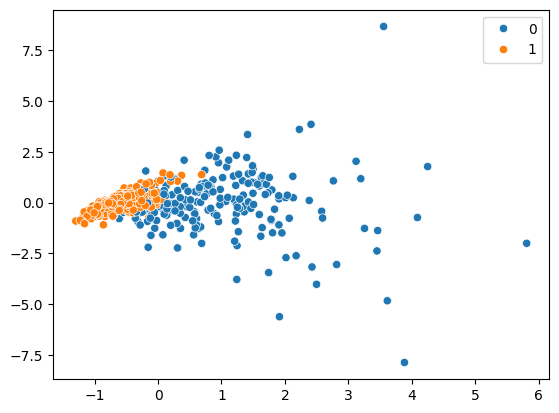

In [10]:
sns.scatterplot(x=cancer_data[:, 0], y=cancer_data[:, 1], hue=cancer_data_default.target)

dataResults(cancer_standard, cancer_data_default.target, 'Default')

ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.012817273793909), pvalue=np.float64(0.7326059133980939))
    mean: np.float64(-4.484491319664026e-17)
    median: np.float64(0.027792600726853148)
    variance: np.float64(1.5047165128558522)
    desc:                 RAM
          count  7.130000e+02
          mean  -4.484491e-17
          std    1.227530e+00
          min   -8.085972e+00
          25%   -3.469784e-01
          50%    2.779260e-02
          75%    4.217112e-01
          max    8.511074e+00


(PearsonRResult(statistic=np.float64(-0.012817273793909), pvalue=np.float64(0.7326059133980939)),
 np.float64(-4.484491319664026e-17),
 np.float64(0.027792600726853148),
 np.float64(1.5047165128558522))

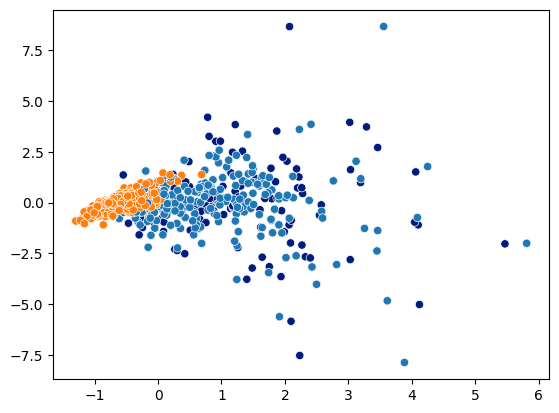

In [11]:
#RAM
ram_data = cancer_data.copy()

cancer_RAM_x, cancer_RAM_y = radiousAngleMethod(ram_data, cancer_data_default.target, 7)

plot_data(cancer_data, cancer_data_default.target, cancer_RAM_x, cancer_RAM_y)

dataResults(cancer_RAM_x, cancer_RAM_y, 'RAM')

ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.042417274861709854), pvalue=np.float64(0.2576570522466234))
    mean: np.float64(3.483052626275001e-17)
    median: np.float64(0.2833943352593171)
    variance: np.float64(1.2697531900944647)
    desc:               SMOTE
          count  7.140000e+02
          mean   3.483053e-17
          std    1.127623e+00
          min   -8.599766e+00
          25%   -2.208733e-01
          50%    2.833943e-01
          75%    5.424769e-01
          max    5.457159e+00


(PearsonRResult(statistic=np.float64(-0.042417274861709854), pvalue=np.float64(0.2576570522466234)),
 np.float64(3.483052626275001e-17),
 np.float64(0.2833943352593171),
 np.float64(1.2697531900944647))

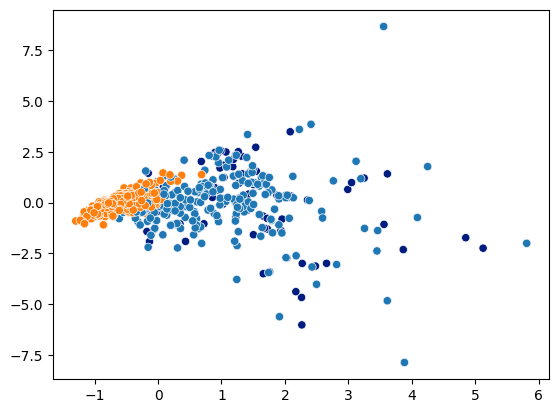

In [12]:
#SMOTE
smote_data = cancer_data.copy()

cancer_SMOTE_x, cancer_SMOTE_y = SMOTE().fit_resample(smote_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_SMOTE_x, cancer_SMOTE_y)

dataResults(cancer_SMOTE_x, cancer_SMOTE_y, 'SMOTE')

ic| pearson_cov: PearsonRResult(statistic=np.float64(0.023999912294577715), pvalue=np.float64(0.5237604117903241))
    mean: np.float64(2.5089785867235176e-17)
    median: np.float64(-0.09430025400019122)
    variance: np.float64(0.8916982068108115)
    desc:              ADASYN
          count  7.080000e+02
          mean   2.508979e-17
          std    9.449653e-01
          min   -6.464401e+00
          25%   -4.852314e-01
          50%   -9.430025e-02
          75%    3.804510e-01
          max    9.277914e+00


(PearsonRResult(statistic=np.float64(0.023999912294577715), pvalue=np.float64(0.5237604117903241)),
 np.float64(2.5089785867235176e-17),
 np.float64(-0.09430025400019122),
 np.float64(0.8916982068108115))

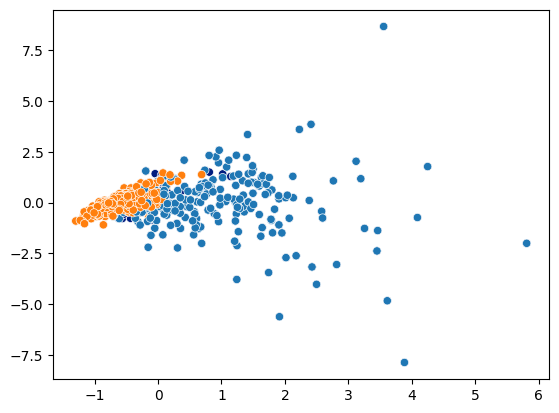

In [13]:
#ADASYN
adasyn_data = cancer_data.copy()

cancer_ADASYN_x, cancer_ADASYN_y = ADASYN().fit_resample(adasyn_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ADASYN_x, cancer_ADASYN_y)

dataResults(cancer_ADASYN_x, cancer_ADASYN_y, 'ADASYN')

ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.10092716053624892), pvalue=np.float64(0.0069543641153047234))
    mean: np.float64(4.975789466107144e-18)
    median: np.float64(0.2757820640478891)
    variance: np.float64(1.357752293786626)
    desc:                 ROS
          count  7.140000e+02
          mean   4.975789e-18
          std    1.166043e+00
          min   -8.589806e+00
          25%   -2.299521e-01
          50%    2.757821e-01
          75%    5.667566e-01
          max    5.710937e+00


(PearsonRResult(statistic=np.float64(-0.10092716053624892), pvalue=np.float64(0.0069543641153047234)),
 np.float64(4.975789466107144e-18),
 np.float64(0.2757820640478891),
 np.float64(1.357752293786626))

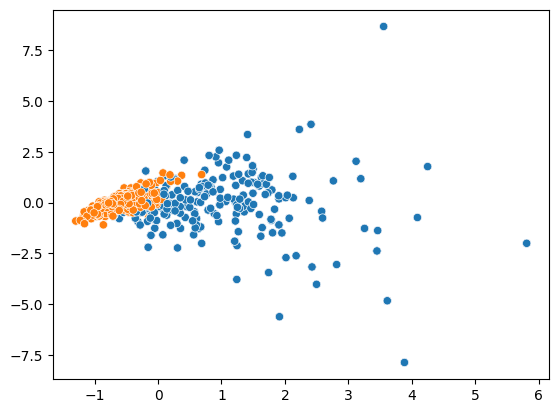

In [14]:
#random oversampling
ros = RandomOverSampler(random_state=0)
ros_data = cancer_data.copy()

cancer_ROS_x, cancer_ROS_y = ros.fit_resample(ros_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ROS_x, cancer_ROS_y)

dataResults(cancer_ROS_x, cancer_ROS_y, 'ROS')

In [15]:
wine_data_default = wine
wine_data = pca.fit_transform(wine_data_default.data)
wine_data = standard_scaler.fit_transform(wine_data)

ic| pearson_cov: PearsonRResult(statistic=np.float64(1.0685896612017132e-15), pvalue=np.float64(0.9999999999999882))
    mean: np.float64(1.197543936674326e-16)
    median: np.float64(-0.07463394283736954)
    variance: np.float64(1.0000000000000013)
    desc:             Default
          count  1.780000e+02
          mean   1.197544e-16
          std    1.002821e+00
          min   -1.922871e+00
          25%   -8.660957e-01
          50%   -7.463394e-02
          75%    5.726164e-01
          max    3.977423e+00


(PearsonRResult(statistic=np.float64(1.0685896612017132e-15), pvalue=np.float64(0.9999999999999882)),
 np.float64(1.197543936674326e-16),
 np.float64(-0.07463394283736954),
 np.float64(1.0000000000000013))

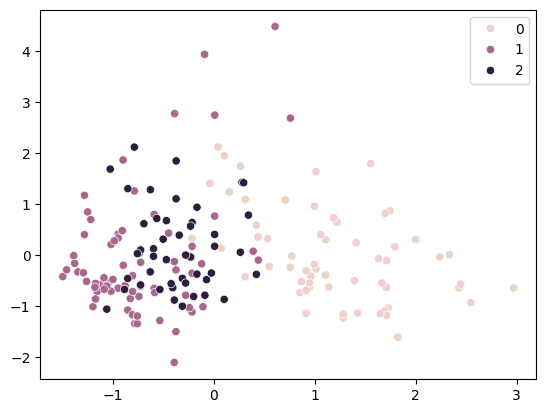

In [16]:
sns.scatterplot(x=wine_data[:, 0], y=wine_data[:, 1], hue=wine_data_default.target)
dataResults(wine_standard, wine_data_default.target, 'Default')

ic| pearson_cov: PearsonRResult(statistic=np.float64(1.0685896612017132e-15), pvalue=np.float64(0.9999999999999882))
    mean: np.float64(1.197543936674326e-16)
    median: np.float64(-0.07463394283736954)
    variance: np.float64(1.0000000000000013)
    desc:             Default
          count  1.780000e+02
          mean   1.197544e-16
          std    1.002821e+00
          min   -1.922871e+00
          25%   -8.660957e-01
          50%   -7.463394e-02
          75%    5.726164e-01
          max    3.977423e+00
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.0037664947078902), pvalue=np.float64(0.9588672383020558))
    mean: np.float64(-1.8698493046318426e-17)
    median: np.float64(-0.11838993499524972)
    variance: np.float64(0.9666508378110252)
    desc:                 RAM
          count  1.900000e+02
          mean  -1.869849e-17
          std    9.857816e-01
          min   -2.186671e+00
          25%   -6.296981e-01
          50%   -1.183899e-01
          75%    4.

(PearsonRResult(statistic=np.float64(-0.0006812652213302114), pvalue=np.float64(0.9921136522819697)),
 np.float64(1.6679406942725357e-17),
 np.float64(-0.19504503663048026),
 np.float64(0.9614187457614816))

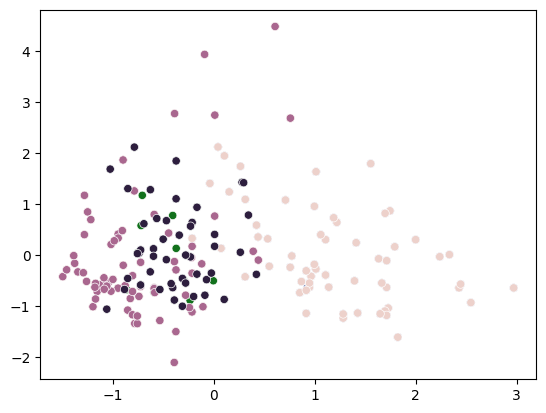

In [17]:
ram_data = wine_data.copy()
smote_data = wine_data.copy()
adasyn_data = wine_data.copy()
ros_data = wine_data.copy()

wine_RAM_x, wine_RAM_y = radiousAngleMethod(ram_data, wine_data_default.target, 7)

wine_SMOTE_x, wine_SMOTE_y = SMOTE().fit_resample(smote_data, wine_data_default.target)

wine_ADASYN_x, wine_ADASYN_y = ADASYN().fit_resample(adasyn_data, wine_data_default.target)

ros = RandomOverSampler(random_state=0)
wine_ROS_x, wine_ROS_y = ros.fit_resample(ros_data, wine_data_default.target)


plot_data(wine_data, wine_data_default.target, wine_RAM_x, wine_RAM_y)

dataResults(wine_standard, wine_data_default.target, 'Default')
dataResults(wine_RAM_x, wine_RAM_y, 'RAM')
dataResults(wine_SMOTE_x, wine_SMOTE_y, 'SMOTE')
dataResults(wine_ADASYN_x, wine_ADASYN_y, 'ADASYN')
dataResults(wine_ROS_x, wine_ROS_y, 'ROS')

<Axes: >

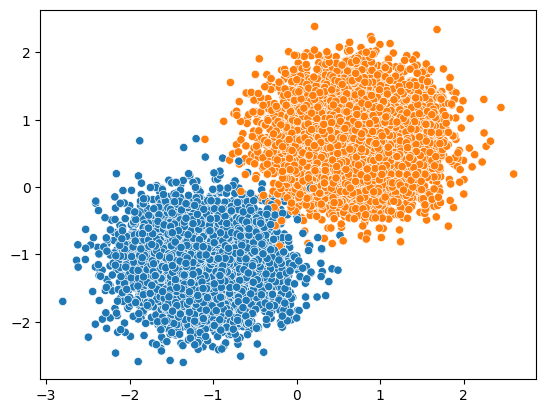

In [18]:
blob_data, blob_features = make_blobs(n_samples=[5000, 8000], centers=[[-2, -2], [2, 2]], n_features=2, random_state=1)

blob_data = standard_scaler.fit_transform(blob_data)

sns.scatterplot(x=blob_data[:, 0], y=blob_data[:, 1], hue=blob_features, legend=False)

In [19]:
ram_data = blob_data.copy()
smote_data = blob_data.copy()
adasyn_data = blob_data.copy()
ros_data = blob_data.copy()

blob_RAM_x, blob_RAM_y = radiousAngleMethod(ram_data, blob_features, 7)

blob_SMOTE_x, blob_SMOTE_y = SMOTE().fit_resample(smote_data, blob_features)

blob_ADASYN_x, blob_ADASYN_y = ADASYN().fit_resample(adasyn_data, blob_features)

ros = RandomOverSampler(random_state=0)
blob_ROS_x, blob_ROS_y = ros.fit_resample(ros_data, blob_features)

dataResults(blob_data, blob_features, 'Default')
dataResults(blob_RAM_x, blob_RAM_y, 'RAM')
dataResults(blob_SMOTE_x, blob_SMOTE_y, 'SMOTE')
dataResults(blob_ADASYN_x, blob_ADASYN_y, 'ADASYN')
dataResults(blob_ROS_x, blob_ROS_y, 'ROS')

ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7898423430815839), pvalue=np.float64(0.0))
    mean: np.float64(2.2955996078403236e-17)
    median: np.float64(0.5881874236755603)
    variance: np.float64(1.7898423430815822)
    desc:             Default
          count  1.300000e+04
          mean   2.295600e-17
          std    1.337901e+00
          min   -3.339159e+00
          25%   -1.425754e+00
          50%    5.881874e-01
          75%    1.101796e+00
          max    2.842029e+00
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7976962433553094), pvalue=np.float64(0.0))
    mean: np.float64(1.1361582782922276e-16)
    median: np.float64(-0.021425553363207672)
    variance: np.float64(1.8781398543375363)
    desc:                 RAM
          count  1.601000e+04
          mean   1.136158e-16
          std    1.370495e+00
          min   -3.040397e+00
          25%   -1.295773e+00
          50%   -2.142555e-02
          75%    1.295079e+00
          max    3.140489

(PearsonRResult(statistic=np.float64(0.7985110764617698), pvalue=np.float64(0.0)),
 np.float64(-4.831690603168682e-16),
 np.float64(-0.020130984894980136),
 np.float64(1.8799405790767532))

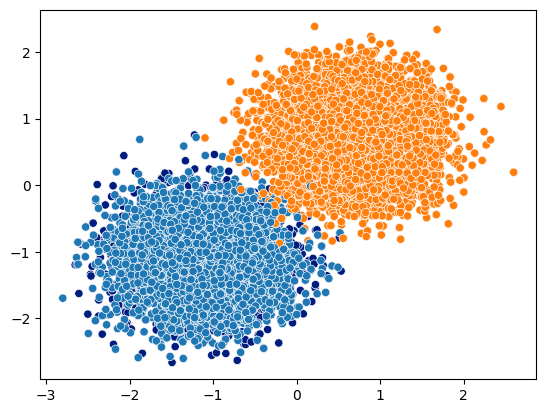

In [20]:
plot_data(blob_data, blob_features, blob_RAM_x, blob_RAM_y)

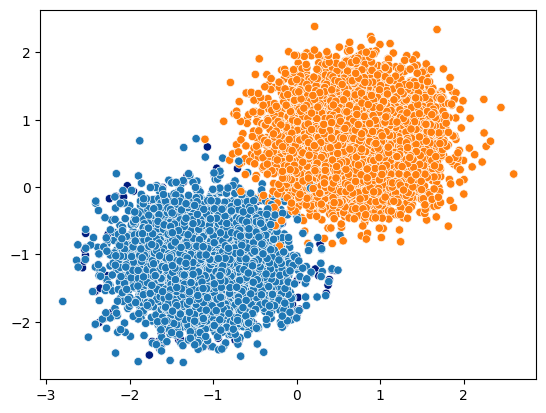

In [21]:
plot_data(blob_data, blob_features, blob_SMOTE_x, blob_SMOTE_y)

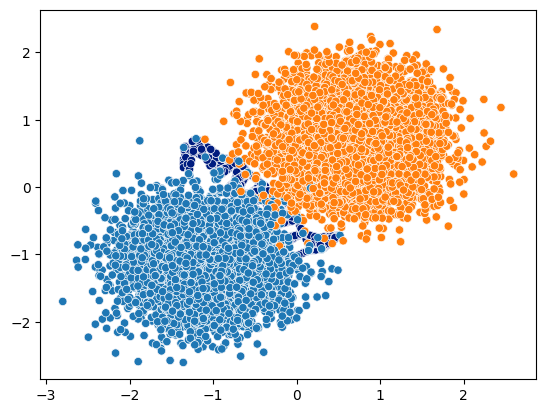

In [22]:
plot_data(blob_data, blob_features, blob_ADASYN_x, blob_ADASYN_y)

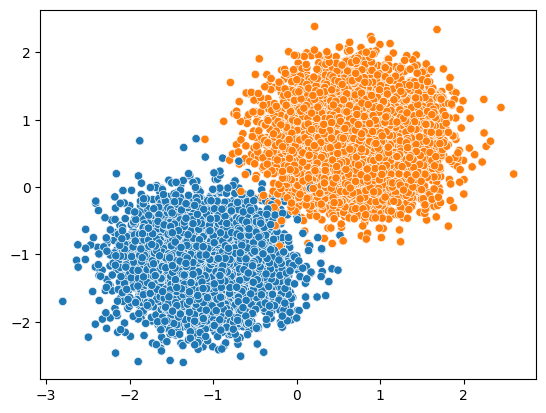

In [23]:
plot_data(blob_data, blob_features, blob_ROS_x, blob_ROS_y)